In [1]:
from scipy.sparse import diags #linalg
from scipy.linalg import solve
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def solver(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E = np.zeros((M+1,N+1))
    S = np.zeros((M+1,N+1))
    S_lag = np.zeros((M+1,N+1))
    C = np.zeros((M+1,N+1))
    X1 = np.zeros((2*M+2,N+1))
    PPX = np.zeros((M+1))
    Em_E = np.zeros((M+1,N+1))
    B = np.zeros((2*M+2))
    RHS = np.zeros((2*M+2))
    React = np.zeros((2*M+2,N+1))

    #initial conditions
    S[0,0] = 1
    C[0,0] = 0
    
    #lagrangian step
    S_lag[0:37,0] = S[0,0]
    X1[:,0] =  np.concatenate((S_lag[:,0],C[:,0]))
    
    #Special time step at n=1
    U = diags([1], [0], shape=(M+1, M+1)).toarray()
    X = np.zeros((M+1)**2).reshape(M+1,M+1)
    Y1 = np.block([[(rho2/dt+r)*U,-r*U],[-r*p*h*U,(rho1/dt+r*p*h)*U]])
    Y2 = np.block([[(rho2/dt)*U,X],[X,(rho1/dt)*U]])
    
    RHS[:] = Y2.dot(X1[:,0]) 
    X1[:,1] = np.linalg.solve(Y1, RHS)
    S[:,1] = X1[0:401,1]
    C[:,1] = X1[401:802,1]
    S[0,1] = 1
        
    for n in range(1,N):
        #update all matrices
        S_lag[0:37,n] = S[0,0]
        S_lag[37:M+1,n] = S[1:M-35,n]+((dt-36*dx)/dx)*(S[0:M-36,n]-S[1:M-35,n])        
        X = np.zeros((M+1)**2).reshape(M+1,M+1)
        X1[:,1] =  np.concatenate((S_lag[:,1],C[:,1]))
        X1[:,2] =  np.concatenate((S_lag[:,2],C[:,2]))
        X1[:,3] =  np.concatenate((S_lag[:,3],C[:,3]))
        X1[:,4] =  np.concatenate((S_lag[:,4],C[:,4]))
        
        U = diags([1], [0], shape=(M+1, M+1)).toarray()
        Y1 = np.block([[(rho2/dt+r)*U,-r*U],[-r*p*h*U,(rho1/dt+r*p*h)*U]])
        Y2 = np.block([[(rho2/dt)*U,X],[X,(rho1/dt)*U]])
        
        RHS[:] = Y2.dot(X1[:,n]) 
        X1[:,n+1] = np.linalg.solve(Y1, RHS)
        S[:,n+1] = X1[0:401,n+1]
        C[:,n+1] = X1[401:802,n+1]
        S[0,n+1] = 1
    return   S, x, t



In [3]:
def solver1(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    Ea = np.zeros((2*M+2,N+1))
    S1 = np.zeros((M+1,N+1))
    S12 = np.zeros((M+1,N+1))
    S11 = np.zeros((M+1,N+1))
    Sa = np.zeros((M+1,N+1))
    C1 = np.zeros((M+1,N+1))
    C12 = np.zeros((M+1,N+1))
    Ca = np.zeros((M+1,N+1))
    PPX = np.zeros((M+1))
    Em = np.zeros((2*M+2,N+1))
    Ei = np.zeros((M+1,N+1))
    X1 = np.zeros((2*M+2,N+1))
    B = np.zeros((M+1))
    RHS1 = np.zeros((2*M+2))
    S1_lag = np.zeros((M+1,N+1))
    S11 = np.zeros((2*M+2,N+1))
    E_for = np.zeros((M+1,N+1))
    E_alm = np.zeros((M+1,N+1)) 
    
    #initial conditions
    Sa[0,0] = 1
    Ca[0,0] = 0
    S1[0,0] = p*h*den*Sa[0,0]
    C1[0,0] = p*h*den*theta*Ca[0,0]
    B[0] = Sa[0,0]  #boundary condition
   
    #lagrangian Step
    S1_lag[0:37,0] = Sa[0,0]
    X1[:,0] = np.concatenate((S1_lag[:,0],Ca[:,0]))
    
    #special time step at n=0
    S12[:,1] = (dt/rho2)*(r*Ca[:,0]-r*S1_lag[:,0])+S1_lag[:,0]
    S11[:,1] = np.concatenate(((rho2/dt)*S12[:,1],np.zeros((M+1))))
    
    U = diags([1], [0,], shape=(M+1, M+1)).toarray()
    X = np.zeros((M+1)**2).reshape(M+1,M+1)
    Y1 = np.block([[(rho2/dt+r)*U,-r*U],[-r*p*h*U,(A*(rho1a/dt)+r*p*h)*U]])
    Y2 = np.block([[r*U,-r*U],[X,(A*(rho1a/dt))*U]])
    RHS1[:] = Y2.dot(X1[:,0]) + S11[:,1]
    Ea[:,1] = np.linalg.solve(Y1, RHS1)
    
    Sa[:,1] = Ea[0:401,1]
    Ca[:,1] = Ea[401:802,1]
    Sa[0,1] = 1
    

    for n in range(1,N):
        S1_lag[0:37,n] = Sa[0,0]
        S1_lag[37:M+1,n] = Sa[1:M-35,n]+((dt-36*dx)/dx)*(Sa[0:M-36,n]-Sa[1:M-35,n])
        X1[:,1] =  np.concatenate((S1_lag[:,1],Ca[:,1]))
        X1[:,2] =  np.concatenate((S1_lag[:,2],Ca[:,2]))
        X1[:,3] =  np.concatenate((S1_lag[:,3],Ca[:,3]))
        X1[:,4] =  np.concatenate((S1_lag[:,4],Ca[:,4]))
        
        S12[:,n+1] = (dt/rho2)*(r*Ca[:,n]-r*S1_lag[:,n])+S1_lag[:,n]
        S11[:,n+1] = np.concatenate(((rho2/dt)*S12[:,n+1],np.zeros((M+1))))
        
        U = diags([1], [0,], shape=(M+1, M+1)).toarray()
        X = np.zeros((M+1)**2).reshape(M+1,M+1)
        Y1 = np.block([[(rho2/dt+r)*U,-r*U],[-r*p*h*U,(A*(rho1a/dt)+r*p*h)*U]])
        Y2 = np.block([[r*U,-r*U],[X,(A*(rho1a/dt))*U]])
        RHS1[:] = Y2.dot(X1[:,n]) + S11[:,n+1]
        Ea[:,n+1] = np.linalg.solve(Y1, RHS1)
        
        Sa[:,n+1] =Ea[0:401,n+1]
        Ca[:,n+1] = Ea[401:802,n+1]   
        Sa[0,n+1] = 1
      
        
    return   Sa, x, t


In [4]:
def solver2(T,dt):
    N = int(round(T/dt))
    t = np.linspace(0,T,N+1) #time discrete
    M = int(round(L/dx))
    x = np.linspace(0,L,M+1) #space discrete
    E = np.zeros((2*M+2,N+1))
    S1 = np.zeros((M+1,N+1))
    S12 = np.zeros((M+1,N+1))
    S11 = np.zeros((M+1,N+1))
    Sb = np.zeros((M+1,N+1))
    C1 = np.zeros((M+1,N+1))
    C12 = np.zeros((M+1,N+1))
    C = np.zeros((M+1,N+1))
    PPX = np.zeros((M+1))
    Em = np.zeros((2*M+2,N+1))
    Ei = np.zeros((M+1,N+1))
    X1 = np.zeros((2*M+2,N+1))
    B = np.zeros((M+1))
    RHS = np.zeros((2*M+2))
    S_lag = np.zeros((M+1,N+1))
    S11 = np.zeros((2*M+2,N+1))
    E_for = np.zeros((M+1,N+1))
    E_alm = np.zeros((M+1,N+1)) 
    
    #initial conditions
    Sb[0,0] = 1
    C[0,0] = 0
       
    #lagrangian Step
    S_lag[0:37,0] = Sb[0,0]
    X1[:,0] = np.concatenate((S_lag[:,0],C[:,0]))
    
    
    #special time step at n=0
    U = diags([1], [0,], shape=(M+1, M+1)).toarray()
    X = np.zeros((M+1)**2).reshape(M+1,M+1)
    Y1 = np.block([[(A*rho2/dt+r*A)*U,-r*A*U],[-r*p*h*U,(A*rho1a/dt+r*p*h)*U]])
    Y2 = np.block([[(A*rho2/dt)*U,X],[X,(A*rho1a/dt)*U]])
    RHS[:] = Y2.dot(X1[:,0])
    
    E[:,1] = np.linalg.solve(Y1, RHS)
    Sb[:,1] =E[0:401,1]
    C[:,1] = E[401:802,1]
    Sb[0,1] = 1
    
    for n in range(1,N):
        S_lag[0:37,n] = Sb[0,0]
        S_lag[37:M+1,n] = Sb[1:M-35,n]+((dt-36*dx)/dx)*(Sb[0:M-36,n]-Sb[1:M-35,n])
                
        X1[:,n] =  np.concatenate((S_lag[:,n],C[:,n]))
               
        U = diags([1], [0,], shape=(M+1, M+1)).toarray()
        X = np.zeros((M+1)**2).reshape(M+1,M+1)
        Y1 = np.block([[(A*rho2/dt+r*A)*U,-r*A*U],[-r*p*h*U,(A*rho1a/dt+r*p*h)*U]])
        Y2 = np.block([[(A*rho2/dt)*U,X],[X,(A*rho1a/dt)*U]])
        RHS[:] = Y2.dot(X1[:,n])
        E[:,n+1] = np.linalg.solve(Y1, RHS)
        Sb[:,n+1] =E[0:401,n+1]
        C[:,n+1] = E[401:802,n+1]  
        Sb[0,n+1] = 1
        
    return   Sb, x, t


In [10]:
from scipy.integrate import quad
#Solving for matrices L1, L2, L3
T = 1800
L = 4000
wd = 10         #width
h = 2           #height
fv = 1          #flow velocity
sg = 1          #specific gravity
den = 1000      #density of CIMW and CMW
p = 2*h+wd      #wetted perimeter
theta = 1       #porosity
l = 10          #element distance
Q = 20          #flow rate
K = 0           #dispersion coefficient K=diffusion+dispersitivity*fv
A = wd*h        #Area
r = 1.5 #Case 2
#r = 0.005 #Case 3
dt = 360        #time step size
dx = 10
w1 = 1          #weight
w2 = 0
N = int(round(T/dt))          #no. of time steps
M = int(round(L/dx))          #no. of nodes
rho1a = p*h*den*theta/A
rho1 = p*h*den*theta
rho2 = den

(S,x,t) = solver(T,dt)
(Sa,x,t) = solver1(T,dt)
(Sb,x,t) = solver2(T,dt)

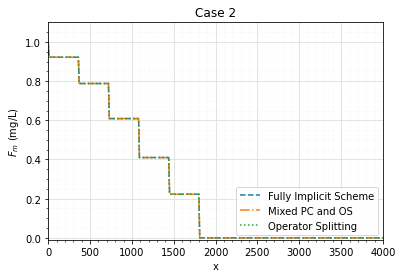

In [11]:
fig, ax = plt.subplots()
ax.axis([-0.1,L+0.1,-0.01,1.1]) 
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()

plt.plot(x,S[:,N], "--")
plt.plot(x,Sa[:,N],"-.")
plt.plot(x,Sb[:,N],":")
plt.legend(["Fully Implicit Scheme", "Mixed PC and OS", "Operator Splitting"], loc ="lower right")
plt.xlabel("x")
plt.ylabel("$F_m$ (mg/L)")
plt.title("Case 2")
plt.savefig('Example 2 Case 2.png')

plt.show()